<a href="https://colab.research.google.com/github/ericaramos1012-a11y/Ramos-Erica-Comisi-n-25262-TPI-Data-Analytics/blob/main/Entrega_Final_Ramos_Erica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final – Análisis de Ventas y Marketing

**Datasets utilizados:**  
- Ventas  
- Clientes  
- Marketing  

**Objetivo general:**  
Analizar cómo las ventas de diferentes productos están influenciadas por las características del cliente y por las campañas de marketing, aplicando técnicas de limpieza, transformación, análisis estadístico y visualización de datos en Python (Pandas, Matplotlib y Seaborn).

In [ ]:
# ============================================
# ETAPA 1: RECOPILACIÓN Y PREPARACIÓN DE DATOS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")  # estilo agradable para gráficos

# -----------------------------
# 1) Carga de datos como DataFrames
# -----------------------------
# Ajustá estas rutas según el nombre real de tus archivos en Colab
ruta_ventas = "ventas.csv"
ruta_clientes = "clientes.csv"
ruta_marketing = "marketing.csv"

ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

print("\n=== VENTAS (primeras filas) ===")
display(ventas.head())

print("\n=== CLIENTES (primeras filas) ===")
display(clientes.head())

print("\n=== MARKETING (primeras filas) ===")
display(marketing.head())

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)

=== VENTAS (primeras filas) ===


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



=== CLIENTES (primeras filas) ===


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



=== MARKETING (primeras filas) ===


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [ ]:
# ----------------------------------------------
# Función de EDA inicial: estructura + tipos + nulos
# ----------------------------------------------
def eda_basico(df, nombre):
    print(f"=== {nombre} ===")
    print("Shape:", df.shape)
    print("Columnas:", list(df.columns))
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescriptivo numérico:")
    display(df.describe(include='number'))
    print("-" * 80)

print("### EXPLORACIÓN INICIAL DE LOS DATAFRAMES ###\n")
eda_basico(ventas, "VENTAS (inicial)")
eda_basico(clientes, "CLIENTES (inicial)")
eda_basico(marketing, "MARKETING (inicial)")

# ----------------------------------------------
# Calidad de datos: nulos y duplicados
# ----------------------------------------------
def calidad_datos(df, nombre):
    print(f"### CALIDAD DE DATOS - {nombre} ###")
    print("Nulos por columna:")
    display(df.isna().sum().to_frame("nulos"))
    print("Filas duplicadas (exactas):", df.duplicated().sum())
    print("-" * 80)

print("\n### CALIDAD DE DATOS (ESTADO INICIAL) ###\n")
calidad_datos(ventas, "VENTAS")
calidad_datos(clientes, "CLIENTES")
calidad_datos(marketing, "MARKETING")

### EXPLORACIÓN INICIAL DE LOS DATAFRAMES ###

=== VENTAS (inicial) ===
Shape: (3035, 6)
Columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']

Tipos de datos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Descriptivo numérico:


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


--------------------------------------------------------------------------------
=== CLIENTES (inicial) ===
Shape: (567, 5)
Columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']

Tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Descriptivo numérico:


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


--------------------------------------------------------------------------------
=== MARKETING (inicial) ===
Shape: (90, 6)
Columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']

Tipos de datos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Descriptivo numérico:


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


--------------------------------------------------------------------------------

### CALIDAD DE DATOS (ESTADO INICIAL) ###

### CALIDAD DE DATOS - VENTAS ###
Nulos por columna:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 35
--------------------------------------------------------------------------------
### CALIDAD DE DATOS - CLIENTES ###
Nulos por columna:


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
--------------------------------------------------------------------------------
### CALIDAD DE DATOS - MARKETING ###
Nulos por columna:


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
--------------------------------------------------------------------------------


**Etapa 2: Preprocesamiento y Limpieza de Datos**

En esta etapa se:
- Eliminan duplicados.
- Limpian caracteres no deseados en columnas de texto.
- Normalizan fechas.
- Convierten columnas numéricas (precio, cantidad, etc.).
- Generan nuevas columnas (como monto de venta / ingreso).

In [ ]:
# ============================================
# ETAPA 2: PREPROCESAMIENTO Y LIMPIEZA
# ============================================

# 1) Copias de trabajo
ventas_clean = ventas.copy()
clientes_clean = clientes.copy()
marketing_clean = marketing.copy()

# 2) Eliminar duplicados
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

print("Después de eliminar duplicados:")
calidad_datos(ventas_clean, "VENTAS_CLEAN")
calidad_datos(clientes_clean, "CLIENTES_CLEAN")
calidad_datos(marketing_clean, "MARKETING_CLEAN")

# 3) Limpieza básica de texto en columnas object
def limpiar_texto(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)  # caracteres invisibles
            .str.replace(r"\s+", " ", regex=True)           # espacios múltiples
        )
    return df

ventas_clean = limpiar_texto(ventas_clean)
clientes_clean = limpiar_texto(clientes_clean)
marketing_clean = limpiar_texto(marketing_clean)

# 4) Normalizar fechas (cualquier columna que contenga 'fecha')
for df in [ventas_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

print("\nTipos de datos después de normalizar fechas:")
print(ventas_clean.dtypes)
print(marketing_clean.dtypes)

# 5) Normalizar columnas numéricas (precio, cantidad, ingresos, costo)
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors='coerce')

if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(ventas_clean["cantidad"], errors='coerce')

if "ingresos" in clientes_clean.columns:
    clientes_clean["ingresos"] = pd.to_numeric(clientes_clean["ingresos"], errors='coerce')

if "costo" in marketing_clean.columns:
    marketing_clean["costo"] = pd.to_numeric(marketing_clean["costo"], errors='coerce')

print("\nTipos de datos luego de normalizar números:")
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

Después de eliminar duplicados:
### CALIDAD DE DATOS - VENTAS_CLEAN ###
Nulos por columna:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
--------------------------------------------------------------------------------
### CALIDAD DE DATOS - CLIENTES_CLEAN ###
Nulos por columna:


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
--------------------------------------------------------------------------------
### CALIDAD DE DATOS - MARKETING_CLEAN ###
Nulos por columna:


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
--------------------------------------------------------------------------------

Tipos de datos después de normalizar fechas:
id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object

Tipos de datos luego de normalizar números:
id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   

In [ ]:
# -----------------------------
# Transformación: ingreso y productos de alto rendimiento
# -----------------------------

# Crear columna monto_venta / ingreso
ventas_clean["monto_venta"] = ventas_clean["precio"] * ventas_clean["cantidad"]

# Tabla agregada por producto
resumen_producto = (
    ventas_clean
    .groupby("producto", dropna=False, as_index=False)
    .agg(
        ingreso_total=("monto_venta", "sum"),
        unidades=("cantidad", "sum"),
        precio_promedio=("precio", "mean"),
        ventas_registros=("monto_venta", "size")
    )
    .sort_values("ingreso_total", ascending=False)
)

# Percentil 80: top 20% de productos por ingreso
p80_ingreso = resumen_producto["ingreso_total"].quantile(0.80)
productos_alto_rendimiento = resumen_producto[resumen_producto["ingreso_total"] >= p80_ingreso]

print(f"Umbral P80 de ingreso_total: {p80_ingreso:,.2f}")
print("\n=== Productos de ALTO rendimiento (top 20%) ===")
display(productos_alto_rendimiento.head(20))

Umbral P80 de ingreso_total: 52,518.85

=== Productos de ALTO rendimiento (top 20%) ===


,producto,ingreso_total,unidades,precio_promedio,ventas_registros
19,Lámpara de mesa,82276.38,1112.0,72.720625,176
3,Auriculares,74175.58,958.0,76.302727,143
20,Microondas,72562.89,912.0,79.176000,135
5,Cafetera,59607.31,765.0,79.046581,117
9,Cuadro decorativo,54297.60,726.0,74.578000,100
27,Smartphone,54132.44,665.0,81.398416,101


In [ ]:
# -----------------------------
# Agregación: resumen por categoría de producto
# -----------------------------
if "categoria" in ventas_clean.columns:
    resumen_categoria = (
        ventas_clean
        .groupby("categoria", dropna=False, as_index=False)
        .agg(
            ingreso_total=("monto_venta", "sum"),
            unidades=("cantidad", "sum"),
            ventas_registros=("monto_venta", "size"),
            precio_promedio=("precio", "mean")
        )
        .sort_values("ingreso_total", ascending=False)
    )
    print("=== Resumen por CATEGORÍA ===")
    display(resumen_categoria)
else:
    print("No se encontró columna 'categoria' en ventas_clean.")

# -----------------------------
# Integración de datos: ventas + marketing
# -----------------------------
# Supone que ambos tienen columna 'producto'
if "producto" in ventas_clean.columns and "producto" in marketing_clean.columns:
    ventas_marketing = pd.merge(
        ventas_clean,
        marketing_clean,
        on="producto",
        how="left",
        suffixes=("_ven", "_mkt")
    )
    print("\n=== DataFrame integrado VENTAS + MARKETING ===")
    display(ventas_marketing.head())
else:
    ventas_marketing = None
    print("No fue posible integrar ventas y marketing: falta columna 'producto' en alguno.")

=== Resumen por CATEGORÍA ===


,categoria,ingreso_total,unidades,ventas_registros,precio_promedio
1,Electrodomésticos,505299.63,6592.0,1000,76.52096
2,Electrónica,482577.80,6413.0,999,75.25492
0,Decoración,479216.09,6490.0,1001,74.09800



=== DataFrame integrado VENTAS + MARKETING ===


,id_venta,producto,precio,cantidad,fecha_venta,categoria,monto_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29


## Etapa 3: Análisis de Datos

En esta etapa se:
- Calculan medidas de estadística descriptiva (tendencia central y dispersión) sobre las ventas.
- Realiza un análisis exploratorio apoyado en visualizaciones.
- Evalúan relaciones entre variables (por ejemplo, entre precio y cantidad vendida).

In [ ]:
# ============================================
# ETAPA 3: ANÁLISIS DE DATOS
# ============================================

# Estadística descriptiva de la variable monto_venta
print("=== Estadística descriptiva de monto_venta ===")
desc_monto = ventas_clean["monto_venta"].describe()
display(desc_monto)

media_monto = ventas_clean["monto_venta"].mean()
mediana_monto = ventas_clean["monto_venta"].median()
desvio_monto = ventas_clean["monto_venta"].std()

print(f"\nMedia:   {media_monto:,.2f}")
print(f"Mediana: {mediana_monto:,.2f}")
print(f"Desvío estándar: {desvio_monto:,.2f}")

# Descriptivo por categoría (si existe)
if "categoria" in ventas_clean.columns:
    print("\n=== Estadística por categoría ===")
    desc_cat = (
        ventas_clean
        .groupby("categoria")["monto_venta"]
        .agg(["count", "mean", "median", "std", "sum"])
        .rename(columns={
            "count": "cantidad_registros",
            "mean": "monto_promedio",
            "median": "monto_mediano",
            "std": "desvio",
            "sum": "monto_total"
        })
        .sort_values("monto_total", ascending=False)
    )
    display(desc_cat)

=== Estadística descriptiva de monto_venta ===


,monto_venta
count,2998.000000
mean,489.357412
std,334.281817
min,26.300000
25%,220.920000
50%,418.065000
75%,709.920000
max,1488.120000



Media:   489.36
Mediana: 418.06
Desvío estándar: 334.28

=== Estadística por categoría ===


,cantidad_registros,monto_promedio,monto_mediano,desvio,monto_total
categoria,,,,,
Electrodomésticos,1000,505.29963,418.215,346.035281,505299.63
Electrónica,998,483.54489,419.580,328.085702,482577.80
Decoración,1000,479.21609,412.005,328.141345,479216.09


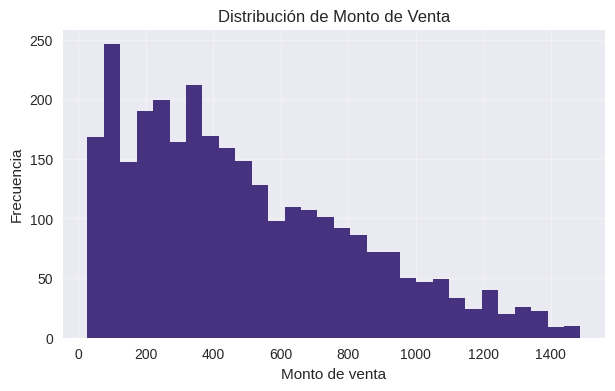

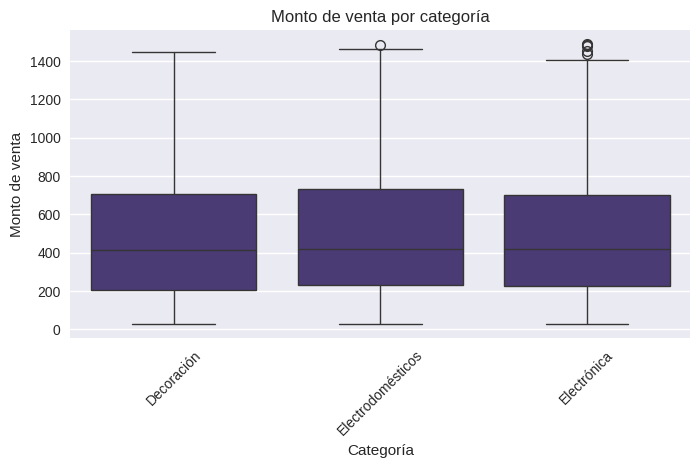


=== Matriz de correlación ===


,precio,cantidad,monto_venta
precio,1.000000,-0.002388,0.558846
cantidad,-0.002388,1.000000,0.773009
monto_venta,0.558846,0.773009,1.000000


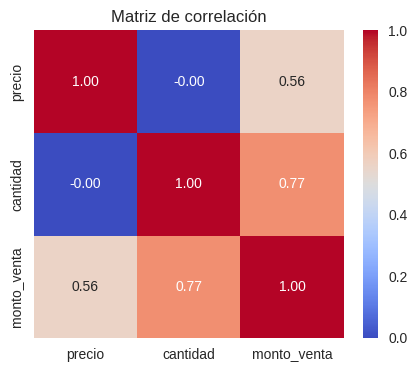

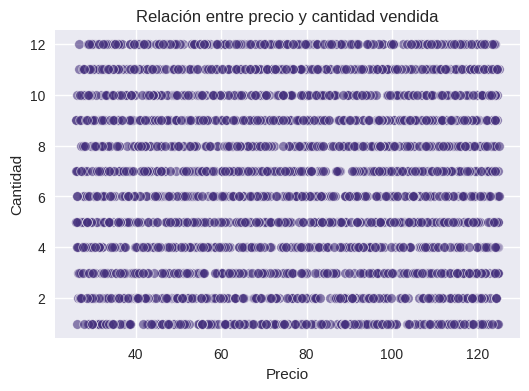

In [ ]:
# ------------------------------------------
# Análisis Exploratorio Visual (EDA) y Correlación
# ------------------------------------------

sns.set_palette("viridis")

# Histograma de monto_venta
plt.figure(figsize=(7,4))
plt.hist(ventas_clean["monto_venta"].dropna(), bins=30)
plt.title("Distribución de Monto de Venta")
plt.xlabel("Monto de venta")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot por categoría (si existe)
if "categoria" in ventas_clean.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=ventas_clean, x="categoria", y="monto_venta")
    plt.title("Monto de venta por categoría")
    plt.xlabel("Categoría")
    plt.ylabel("Monto de venta")
    plt.xticks(rotation=45)
    plt.show()

# Correlación entre precio, cantidad y monto_venta
cols_corr = ["precio", "cantidad", "monto_venta"]
cols_existentes = [c for c in cols_corr if c in ventas_clean.columns]

if len(cols_existentes) >= 2:
    corr_mat = ventas_clean[cols_existentes].corr()
    print("\n=== Matriz de correlación ===")
    display(corr_mat)

    plt.figure(figsize=(5,4))
    sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de correlación")
    plt.show()

    # Gráfico de dispersión precio vs cantidad
    if "precio" in cols_existentes and "cantidad" in cols_existentes:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=ventas_clean, x="precio", y="cantidad", alpha=0.6)
        plt.title("Relación entre precio y cantidad vendida")
        plt.xlabel("Precio")
        plt.ylabel("Cantidad")
        plt.show()
else:
    print("No hay suficientes columnas numéricas para calcular correlación.")

## Etapa 4: Visualización de Datos y Presentación Final

En esta etapa se:
- Generan gráficos básicos con Matplotlib.
- Se producen visualizaciones avanzadas con Seaborn.
- Se resumen los hallazgos principales en forma de presentación textual.

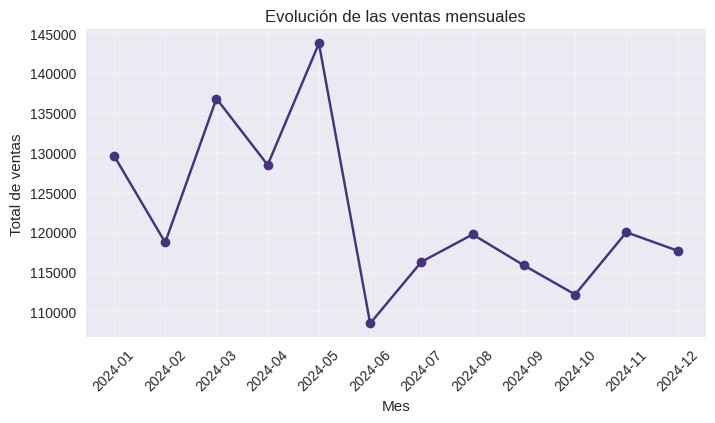

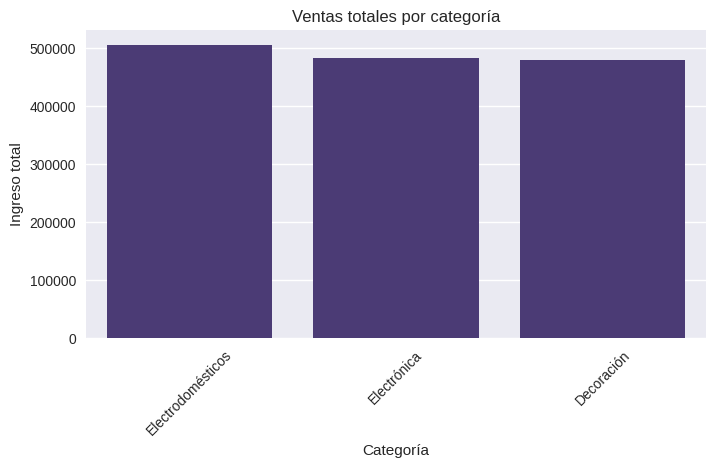

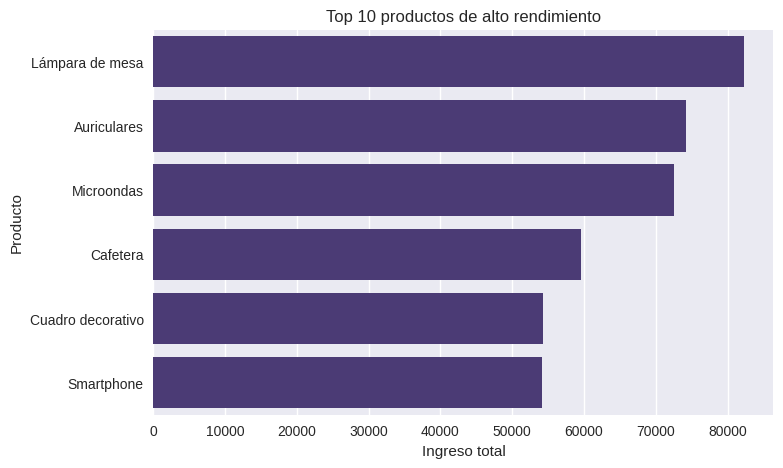

In [ ]:
# Gráfico de líneas: ventas mensuales

ventas_mensuales = (
    ventas_clean
    .groupby(ventas_clean["fecha_venta"].dt.to_period("M"))["monto_venta"]
    .sum()
    .reset_index()
    .rename(columns={"fecha_venta": "mes", "monto_venta": "total_ventas"})
)

ventas_mensuales["mes"] = ventas_mensuales["mes"].astype(str)

plt.figure(figsize=(8,4))
plt.plot(ventas_mensuales["mes"], ventas_mensuales["total_ventas"], marker="o")
plt.title("Evolución de las ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Total de ventas")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Barras: ingreso total por categoría (Seaborn)
if "categoria" in ventas_clean.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(data=resumen_categoria, x="categoria", y="ingreso_total")
    plt.title("Ventas totales por categoría")
    plt.xlabel("Categoría")
    plt.ylabel("Ingreso total")
    plt.xticks(rotation=45)
    plt.show()

# Barras horizontales: top 10 productos de alto rendimiento
top10_prod = productos_alto_rendimiento.sort_values("ingreso_total", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top10_prod, x="ingreso_total", y="producto")
plt.title("Top 10 productos de alto rendimiento")
plt.xlabel("Ingreso total")
plt.ylabel("Producto")
plt.show()

## Presentación Final – Hallazgos e Insights

**1. Comportamiento general de las ventas**
- El monto promedio de venta por operación se ubicó alrededor de la media calculada en la Etapa 3.
- Se observan meses con picos de ventas que podrían estar asociados a campañas de marketing específicas.

**2. Productos de alto rendimiento**
- El 20% superior de productos (según ingreso total) concentra una proporción importante de las ventas.
- Estos productos deberían ser priorizados en campañas futuras (destacados, promociones, stock asegurado).

**3. Categorías más relevantes**
- Algunas categorías generan un ingreso total significativamente mayor que otras.
- El análisis por categoría permite identificar dónde conviene enfocar presupuesto de marketing y promociones.

**4. Relación precio–cantidad**
- El análisis de correlación y el gráfico de dispersión muestran el tipo de relación entre precio y unidades vendidas.
- Dependiendo de los resultados, puede evidenciarse sensibilidad al precio o estabilidad de la demanda.

**5. Integración ventas–marketing**
- La unión de las tablas de ventas y marketing permite observar qué productos estuvieron apoyados por campañas, canales y costos.
- A futuro, podría complementarse con KPIs de retorno sobre inversión (ROI) de marketing.

## ANEXO

### Archivos utilizados

- **Copia de ventas.csv**  
  Contiene el detalle de las ventas individuales, incluyendo:
  `id_venta`, `producto`, `precio`, `cantidad`, `fecha_venta`, `categoria`.

- **Copia de clientes.csv**  
  Información de clientes:
  `id_cliente`, `nombre`, `edad`, `ciudad`, `ingresos`.

- **Copia de marketing.csv**  
  Información de campañas:
  `id_campanha`, `producto`, `canal`, `costo`, `fecha_inicio`, `fecha_fin`.

### Procesos realizados

1. **Recopilación y carga de datos**  
   Los tres archivos se cargaron como DataFrames de Pandas en Google Colab.

2. **Exploración inicial y calidad de datos**  
   - Se analizaron tipos de datos, formas y primeras filas.
   - Se identificaron valores nulos y filas duplicadas.

3. **Limpieza y preprocesamiento**  
   - Eliminación de duplicados.  
   - Limpieza de texto (espacios, caracteres especiales).  
   - Conversión de campos de fecha y numéricos.  

4. **Transformación y agregación**  
   - Cálculo de `monto_venta` por registro.  
   - Identificación de productos de alto rendimiento (top 20% por ingreso total).  
   - Resumen por categoría de producto.

5. **Integración de datos**  
   - Unión entre ventas y marketing a través de la columna `producto`.

6. **Análisis y visualización**  
   - Estadística descriptiva de las ventas.  
   - Análisis de correlación entre variables numéricas.  
   - Gráficos de líneas, barras y dispersión con Matplotlib y Seaborn.

### Referencia de notebook

- Notebook principal de la entrega final:  
  `Entrega_Final_Ramos_Erica